In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d patrickzel/flight-delay-and-cancellation-dataset-2019-2023

Dataset URL: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023
License(s): other
 98% 137M/140M [00:05<00:00, 32.0MB/s]
100% 140M/140M [00:05<00:00, 25.9MB/s]


In [ ]:
!unzip /content/flight-delay-and-cancellation-dataset-2019-2023.zip

Archive:  /content/flight-delay-and-cancellation-dataset-2019-2023.zip
  inflating: dictionary.html         
  inflating: flights_sample_3m.csv   


### Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Flight delays and cancellations for January 2019 – August 2023

In [ ]:
mydf = pd.read_csv('/content/flights_sample_3m.csv')

In [ ]:
mydf.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [ ]:
df.AIRLINE.unique()

array(['United Air Lines Inc.', 'Delta Air Lines Inc.',
       'Spirit Air Lines', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'Republic Airline',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'PSA Airlines Inc.',
       'Allegiant Air', 'ExpressJet Airlines LLC d/b/a aha!',
       'SkyWest Airlines Inc.', 'Endeavor Air Inc.', 'Envoy Air',
       'Frontier Airlines Inc.', 'Mesa Airlines Inc.', 'Horizon Air',
       'Hawaiian Airlines Inc.'], dtype=object)

In [ ]:
df.DOT_CODE.unique()

array([19977, 19790, 20416, 19393, 19805, 20452, 19930, 20409, 20397,
       20368, 20366, 20304, 20363, 20398, 20436, 20378, 19687, 19690])


**Airline and its code in relation to the United States Department of Transportation**

In [ ]:
mydf[['AIRLINE', 'AIRLINE_CODE', 'DOT_CODE','FL_NUMBER']].drop_duplicates()

,AIRLINE,AIRLINE_CODE,DOT_CODE,FL_NUMBER
0,United Air Lines Inc.,UA,19977,1562
1,Delta Air Lines Inc.,DL,19790,1149
2,United Air Lines Inc.,UA,19977,459
3,Delta Air Lines Inc.,DL,19790,2295
4,Spirit Air Lines,NK,20416,407
...,...,...,...,...
2986957,Frontier Airlines Inc.,F9,20436,1973
2987496,Allegiant Air,G4,20368,6245
2989975,Spirit Air Lines,NK,20416,2536
2999368,Frontier Airlines Inc.,F9,20436,705


## Pre-Process Data

### Handling missing values


In [ ]:
df.isna().sum()/df.shape[0]*100

,0
FL_DATE,0.000000
AIRLINE,0.000000
AIRLINE_DOT,0.000000
AIRLINE_CODE,0.000000
DOT_CODE,0.000000
FL_NUMBER,0.000000
ORIGIN,0.000000
ORIGIN_CITY,0.000000
DEST,0.000000
DEST_CITY,0.000000


- As can be seen from the above, the `CANCELLATION_CODE` column contains 97% missing data. Since this data has no bearing on the other columns, it may be safely excluded from our analysis.

- We replace the **null** values with 0 minutes since the columns `DELAY_DUE_CARRIER`, `DELAY_DUE_WEATHER`, `DELAY_DUE_NAS`, `DELAY_DUE_SECURITY`, and `DELAY_DUE_LATE_AIRCRAFT` are in minutes and useful for our analysis. demonstrating the plane's non-delay.

- Depending on the distribution of the remaining 2% of the columns, either the mean or the median will be imputed.


#### Dataset datatypes

In [ ]:
print(df.dtypes)

FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER   

#### Converting column datatypes

In [ ]:
# these are columns where their datatypes has to be changed from int64, float64 to object
cols_to_obj = ['DOT_CODE', 'FL_NUMBER', 'CANCELLED', 'DIVERTED']

df[cols_to_obj] = df[cols_to_obj].astype('int64')
df[cols_to_obj] = df[cols_to_obj].astype('object')

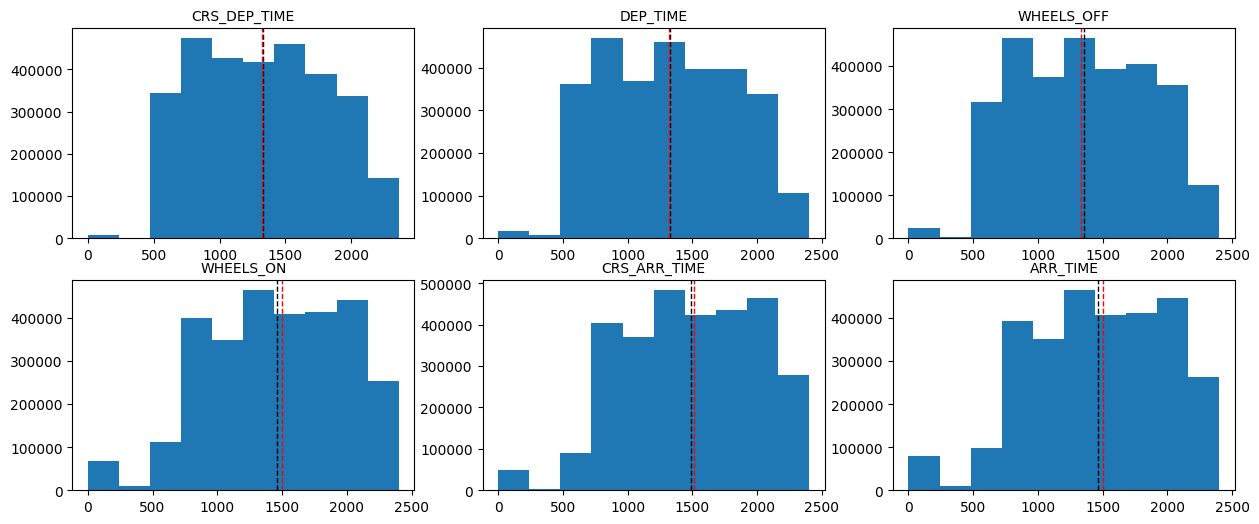

In [ ]:
# these are columns where their datatypes has to be changed from int64, float64 to datetime
cols_to_datetime = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME']

fig = plt.figure(figsize=(15,6))
rows, cols = 2,3

for i in range(1, len(cols_to_datetime)+1):
  fig.add_subplot(rows, cols, i)
  plt.hist(df[cols_to_datetime[i-1]])

  plt.title(cols_to_datetime[i-1],fontsize=10)

  #add horizontal average line
  plt.axvline(df[cols_to_datetime[i-1]].mean(),color='k', linestyle='dashed', linewidth=1)

  #add horizontal average line
  plt.axvline(df[cols_to_datetime[i-1]].median(),color='r', linestyle='dashed', linewidth=1)

- We use the histogram plots as a guide to fill in the 2% column's missing values with the means of those values.

In [ ]:
print(df[cols_to_datetime].isna().sum())

CRS_DEP_TIME        0
DEP_TIME        77615
WHEELS_OFF      78806
WHEELS_ON       79944
CRS_ARR_TIME        0
ARR_TIME        79942
dtype: int64


- The arrival and departure times are missing from a few rows. We just eliminate all the rows with null values since it wouldn't make sense to impute these missing values.

In [ ]:
print(f"Dataframe shape: {df.shape}")
df.dropna(subset=cols_to_datetime, inplace=True)
print(f"Dataframe shape after removing null values: {df.shape}")

Dataframe shape: (3000000, 32)
Dataframe shape after removing null values: (2920056, 32)


In [ ]:
# float to int datatype
df[cols_to_datetime] = df[cols_to_datetime].astype('int64')

In [ ]:
def format_time(time_str):
  return time_str[:-2] + ":" + time_str[-2:]

for col in cols_to_datetime:
  # Apply the function to the specified columns
  df[col] = df[col].astype(str).apply(format_time)

In [ ]:
df[cols_to_datetime]

,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME
0,11:55,11:51,12:10,14:43,15:01,14:47
1,21:20,21:14,21:23,22:32,23:15,23:10
2,9:54,10:00,10:20,12:47,12:52,12:52
3,16:09,16:08,16:35,18:44,18:29,18:53
4,18:40,18:38,18:53,20:26,20:41,20:40
...,...,...,...,...,...,...
2999995,17:42,17:40,17:50,18:45,19:07,18:51
2999996,13:00,12:54,13:04,15:14,15:56,15:19
2999997,5:34,6:15,6:31,7:59,7:29,8:05
2999998,16:00,15:55,16:14,17:04,17:28,17:12


#### Filling missing time values with 0

In [ ]:
df.drop('CANCELLATION_CODE', axis=1, inplace=True)

In [ ]:
cols = ['ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
        'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

df[cols] = df[cols].fillna(0)

### Working with time features

In [ ]:
# converting column to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
print(df['FL_DATE'].dtype)

# seperating year, month & day
df['FL_YEAR'] = df['FL_DATE'].dt.year
df['FL_MONTH'] = df['FL_DATE'].dt.month
df['FL_DAY'] = df['FL_DATE'].dt.day

# deleting date column
df.drop('FL_DATE', axis=1, inplace=True)

datetime64[ns]


TODO
- EXCLUDE THE COLUMNS `DUE_TO_DELAY_*`
- FEATURES WHICH NEED TO BE THERE ARE FLIGHT DETAILS **Date, time, airline, origin/destination**
- DISTANCE AND FLIGHT DURATION

#### Converting the time feature frmo HH:MM format to minutes

In [ ]:
def convert_time_to_minutes(time_str):
  try:
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

  except ValueError:
    hours = 0
    minutes = int(time_str.replace(":", ""))
    return hours * 60 + minutes


for col in cols_to_datetime:
  df[col] = df[col].apply(convert_time_to_minutes)

In [ ]:
df[cols_to_datetime]

,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME
0,715,711,730,883,901,887
1,1280,1274,1283,1352,1395,1390
2,594,600,620,767,772,772
3,969,968,995,1124,1109,1133
4,1120,1118,1133,1226,1241,1240
...,...,...,...,...,...,...
2999995,1062,1060,1070,1125,1147,1131
2999996,780,774,784,914,956,919
2999997,334,375,391,479,449,485
2999998,960,955,974,1024,1048,1032


In [ ]:
# converting all the time features to int64
time_features = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
                 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON','TAXI_IN',
                 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
                 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME']

df[time_features] = df[time_features].astype('int64')
print(df[time_features].dtypes)

CRS_DEP_TIME        int64
DEP_TIME            int64
DEP_DELAY           int64
TAXI_OUT            int64
WHEELS_OFF          int64
WHEELS_ON           int64
TAXI_IN             int64
CRS_ARR_TIME        int64
ARR_TIME            int64
ARR_DELAY           int64
CRS_ELAPSED_TIME    int64
ELAPSED_TIME        int64
AIR_TIME            int64
dtype: object


In [ ]:
df[['CANCELLED', 'DIVERTED']]

,CANCELLED,DIVERTED
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2999995,0,0
2999996,0,0
2999997,0,0
2999998,0,0


In [ ]:
df[time_features]

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME
0,715,711,-4,19,730,883,4,901,887,-14,186,176,153
1,1280,1274,-6,9,1283,1352,38,1395,1390,-5,235,236,189
2,594,600,6,20,620,767,5,772,772,0,118,112,87
3,969,968,-1,27,995,1124,9,1109,1133,24,260,285,249
4,1120,1118,-2,15,1133,1226,14,1241,1240,-1,181,182,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,1062,1060,-2,10,1070,1125,6,1147,1131,-16,85,71,55
2999996,780,774,-6,10,784,914,5,956,919,-37,176,145,130
2999997,334,375,41,16,391,479,6,449,485,36,55,50,28
2999998,960,955,-5,19,974,1024,8,1048,1032,-16,88,77,50


### Creating our target column

In [ ]:
status = []

for value in df['ARR_DELAY']:
    if value <= 10:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status

###Removing unnesccary cols

In [ ]:
df.columns

Index(['AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER',
       'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FL_YEAR', 'FL_MONTH',
       'FL_DAY', 'FLIGHT_STATUS'],
      dtype='object')

In [ ]:
drop_cols = ['AIRLINE', 'AIRLINE_DOT', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN_CITY', 'DEST_CITY',
             'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

df.drop(drop_cols, axis=1, inplace=True)

In [ ]:
df.head()

,AIRLINE_CODE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,FL_YEAR,FL_MONTH,FL_DAY,FLIGHT_STATUS
0,UA,FLL,EWR,715,711,-4,19,730,883,4,...,0,0,186,176,153,1065.0,2019,1,9,0
1,DL,MSP,SEA,1280,1274,-6,9,1283,1352,38,...,0,0,235,236,189,1399.0,2022,11,19,0
2,UA,DEN,MSP,594,600,6,20,620,767,5,...,0,0,118,112,87,680.0,2022,7,22,0
3,DL,MSP,SFO,969,968,-1,27,995,1124,9,...,0,0,260,285,249,1589.0,2023,3,6,1
4,NK,MCO,DFW,1120,1118,-2,15,1133,1226,14,...,0,0,181,182,153,985.0,2020,2,23,0


In [ ]:
# df.to_csv('flightdelay.csv')

## GNN for flight status

Creating a multigraph for flight status detection using flight delay data and applying a Graph Neural Network (GNN) on the edge list can be done in the following steps:

1. Preparing the flight delay data: Collect and organize the transaction data into a format that can be used to create the edges of the multigraph. For example, each flight journey could be represented as a tuple (node1, node2, attributes), where node1 and node2 represent the departure and arrival of the airport, and attributes is a dictionary containing properties such as the amount, timestamp, and transaction type.

2. Creating the multigraph: Use the flight delay data to create a multigraph using the NetworkX library. The add_edge() method can be used to add edges to the multigraph, where each edge represents a transaction.

3. Extract the edges list and their features: Use the edges() method of the multigraph to extract the edges list and their features, which will be used as input to the GNN.

4. Applying a GNN on the edge list: Use a GNN library such as PyTorch Geometric apply a GNN on the edge list. The GNN will learn representations of the edges in the multigraph and use them to classify the edges as fraudulent or non-fraudulent.

5. Evaluation: To evaluate the performance of the GNN, you can split the data into train and test sets, and use the test set to evaluate the accuracy, precision, recall, and F1-score of the model.

### Importing Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/flightdelay.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

df_sample = df.sample(frac=0.01, random_state=42)  # Use 10% of the data

print(f"Number of rows: {df_sample.shape[0]} | Number of columns: {df_sample.shape[1]}")
print(f"\nColumns in the dataset: {df_sample.columns}")
print("\nTarget Variable: FLIGHT_STATUS")

Number of rows: 29201 | Number of columns: 25

Columns in the dataset: Index(['AIRLINE_CODE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FL_YEAR',
       'FL_MONTH', 'FL_DAY', 'FLIGHT_STATUS', 'DOT_CODE', 'FL_NUMBER'],
      dtype='object')

Target Variable: FLIGHT_STATUS


### Train - Test splits

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
features = df_sample.drop(['FLIGHT_STATUS'], axis=1)
target = df_sample['FLIGHT_STATUS']  # Assuming this is your target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Reconstruct the training dataframe for node and edge creation
train_df = X_train.copy()
train_df['FLIGHT_STATUS'] = y_train

### Data Analysis

In [ ]:
for i in ['FL_YEAR','FL_MONTH', 'FL_DAY']:
  print(i)
  print(set(df_sample[i].unique()))
  print("\n")

FL_YEAR
{2019, 2020, 2021, 2022, 2023}


FL_MONTH
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


FL_DAY
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}




In [ ]:
df_sample.groupby(['AIRLINE_CODE','ORIGIN'])['DEST'].size()

AIRLINE_CODE  ORIGIN
9E            ABE       8
              ABY       3
              AEX       7
              AGS       7
              ALB       2
                       ..
YX            TUL       1
              TUS       1
              TVC       1
              VPS       1
              XNA       3
Name: DEST, Length: 1779, dtype: int64

In [ ]:
df_sample.groupby(['AIRLINE_CODE','ORIGIN','DEST']).size().sort_values(ascending=False)

AIRLINE_CODE  ORIGIN  DEST
AS            SEA     ANC     30
HA            OGG     HNL     29
DL            ATL     MCO     28
HA            HNL     KOA     28
                      OGG     28
                              ..
OO            DEN     GEG      1
                      FSD      1
                      FLG      1
                      EAR      1
              LIT     IAH      1
Length: 8977, dtype: int64

In [ ]:
df_sample.groupby(['AIRLINE_CODE','ORIGIN','DEST'])['FLIGHT_STATUS'].sum().sort_values(ascending=False)

AIRLINE_CODE  ORIGIN  DEST
AA            MIA     LGA     11
DL            ATL     TPA     10
AA            DFW     SAT      9
B6            LAX     JFK      8
AA            DFW     SFO      8
                              ..
NK            ACY     MYR      0
                      MIA      0
                      ATL      0
              ABQ     LAS      0
YX            XNA     LGA      0
Name: FLIGHT_STATUS, Length: 8977, dtype: int64

In [ ]:
df_sample.groupby(['AIRLINE_CODE'])['FLIGHT_STATUS'].sum().sort_values(ascending=False)

,FLIGHT_STATUS
AIRLINE_CODE,
WN,1275
AA,895
DL,673
OO,599
UA,550
B6,333
MQ,256
NK,225
YX,221


In [ ]:
df_sample.groupby(['FL_YEAR', 'FL_MONTH', 'FL_DAY', 'ORIGIN', 'DEST'])[['FLIGHT_STATUS']].sum().sort_values(by='FLIGHT_STATUS',ascending=False)

FLIGHT_STATUS
FL_YEAR FL_MONTH FL_DAY ORIGIN DEST               
2019    12       2      MIA    LGA               2
        5        9      SFO    PDX               2
2023    2        12     MCO    MEM               2
2021    12       6      MIA    LGA               2
        7        1      SHV    DFW               1
...                                            ...
2020    9        23     HNL    ITO               0
                        CLT    HHH               0
                        BDL    BWI               0
                        AUS    IAH               0
2023    8        31     VPS    BWI               0

[29102 rows x 1 columns]

### Graph Construction - Step 1

In [ ]:
df_sample = df_sample.sort_values(['FL_YEAR', 'FL_MONTH', 'FL_DAY'], ascending=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create an empty directed graph
G = nx.DiGraph()

# Create a set to store unique flight identifiers
unique_flights = set()

# Create nodes for unique flights
for index, row in df_sample.iterrows():
    # Create a unique identifier for each flight based on relevant columns
    flight_id = f"{row['AIRLINE_CODE']}_{row['ORIGIN']}_{row['DEST']}"

    # Only add the node if this flight_id is not already in the set
    if flight_id not in unique_flights:
        G.add_node(flight_id,
                   airline=row['AIRLINE_CODE'],
                   origin=row['ORIGIN'],
                   destination=row['DEST'],
                   crs_dep_time=row['CRS_DEP_TIME'],
                   dep_time=row['DEP_TIME'],
                   arr_time=row['ARR_TIME'],
                   crs_arr_time=row['CRS_ARR_TIME'],
                   dep_delay=row['DEP_DELAY'],
                   flight_status=row['FLIGHT_STATUS'])

        # Add the flight_id to the set of unique flights
        unique_flights.add(flight_id)

# Print graph information
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph created with 8977 nodes and 0 edges.


#### Flights departing from the same airport within a close time window can be connected by an edge



In [ ]:
df_sample['flight_id'] = df_sample['AIRLINE_CODE'] + "_" + df_sample['FL_NUMBER'].astype(str) + "_" + df_sample['FL_YEAR'].astype(str)+ "_" + df_sample['FL_MONTH'].astype(str)+ "_" + df_sample['FL_DAY'].astype(str)

# Define the time threshold for temporal proximity (e.g., 30 minutes)
time_threshold = 30

# Create edges based on temporal proximity at the same origin airport
for origin, group in df_sample.groupby('ORIGIN'):
    # Sort flights by departure time within each origin
    group = group.sort_values(by='CRS_DEP_TIME')

    # Iterate through each pair of flights at the same origin
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            # Get the departure time difference
            time_diff = abs(group.iloc[i]['CRS_DEP_TIME'] - group.iloc[j]['CRS_DEP_TIME'])

            # If the time difference is within the threshold, create an edge
            if time_diff <= time_threshold:
                G.add_edge(group.iloc[i]['flight_id'], group.iloc[j]['flight_id'])

# Print graph information
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

#### Edges Based on Same Airline


In [ ]:
# Create edges based on same AIRLINE_CODE and same FL_DATE
for airline, group in df_sample.groupby(['AIRLINE_CODE', 'FL_MONTH', 'FL_DAY']):
    flight_ids = group['flight_id'].tolist()

    # Connect every pair of flights from the same airline on the same day
    for i in range(len(flight_ids)):
        for j in range(i + 1, len(flight_ids)):
            G.add_edge(flight_ids[i], flight_ids[j])

# Print graph information
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

#### Edges Based on Origin-Destination Pairs

In [ ]:
# Create edges based on Origin-Destination pairs
# Group flights by ORIGIN and DEST
for od_pair, group in df_sample.groupby(['ORIGIN', 'DEST']):
    flight_ids = group['flight_id'].tolist()

    # Connect every pair of flights flying between the same ORIGIN and DEST
    for i in range(len(flight_ids)):
        for j in range(i + 1, len(flight_ids)):
            G.add_edge(flight_ids[i], flight_ids[j])

# Print graph information
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

#### Delay-Based Edges (Flights with Similar Delays)

In [ ]:
# Threshold for delay (in minutes)
delay_threshold = 30

# Create edges based on similar delays
# Filter flights that have DEP_DELAY or ARR_DELAY greater than the threshold
delayed_flights = df_sample[(df_sample['DEP_DELAY'] > delay_threshold) | (df_sample['ARR_DELAY'] > delay_threshold)]

# Create edges between all flights with delays greater than the threshold
flight_ids = delayed_flights['flight_id'].tolist()

# Create edges between all flights with similar delays
for i in range(len(flight_ids)):
    for j in range(i + 1, len(flight_ids)):
        G.add_edge(flight_ids[i], flight_ids[j], relationship="similar_delay")

# Print graph information
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

#### Saving nodes and edges to a pickle file

In [ ]:
import networkx as nx
import pickle

# Assume G is your NetworkX graph object
nodes = list(G.nodes(data=True))
edges = list(G.edges(data=True))

# Save the nodes and edges using pickle
with open('gnn_data.pkl', 'wb') as f:
    pickle.dump({'nodes': nodes, 'edges': edges}, f)

### Graph Construction - Step 2

#### Load the Graph from the Pickle File

In [1]:
import pickle

# Load the data from the pickle file
with open('/content/drive/MyDrive/gnn_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Check the type of the data
print(type(data))

<class 'dict'>


In [2]:
loaded_nodes = data['nodes']
loaded_edges = data['edges']

#### Encoding the node features

Feature Engineering for Node Embeddings. We need to convert your nodes (flights) into numerical representations (embeddings).

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Lists to store extracted attributes
airlines = []
origins = []
destinations = []
dep_delays = []
crs_dep_times = []

# Default values for missing data
default_airline = 'UNKNOWN'
default_origin = 'UNKNOWN'
default_destination = 'UNKNOWN'
default_dep_delay = 0  # e.g., no delay
default_crs_dep_time = 0  # e.g., midnight

# Extract features from loaded_nodes
for node_id, attrs in loaded_nodes:
    # Handle missing attributes by using default values
    airline = attrs.get('airline', default_airline)
    origin = attrs.get('origin', default_origin)
    destination = attrs.get('destination', default_destination)
    dep_delay = attrs.get('dep_delay', default_dep_delay)
    crs_dep_time = attrs.get('crs_dep_time', default_crs_dep_time)

    airlines.append(airline)
    origins.append(origin)
    destinations.append(destination)
    dep_delays.append(dep_delay)
    crs_dep_times.append(crs_dep_time)

# Encode categorical features (airline, origin, destination)
label_encoder_airline = LabelEncoder()
label_encoder_origin = LabelEncoder()
label_encoder_destination = LabelEncoder()

encoded_airlines = label_encoder_airline.fit_transform(airlines)
encoded_origins = label_encoder_origin.fit_transform(origins)
encoded_destinations = label_encoder_destination.fit_transform(destinations)

# Normalize numerical features (dep_delay, crs_dep_time)
scaler = StandardScaler()
scaled_dep_delays = scaler.fit_transform(np.array(dep_delays).reshape(-1, 1)).flatten()
scaled_crs_dep_times = scaler.fit_transform(np.array(crs_dep_times).reshape(-1, 1)).flatten()

# Combine the encoded and scaled features into a feature matrix
node_features = np.vstack([encoded_airlines, encoded_origins, encoded_destinations, scaled_dep_delays, scaled_crs_dep_times]).T

# Display the result (for verification)
print("Node features matrix:")
print(node_features)

Node features matrix:
[[ 1.80000000e+01  2.44000000e+02  1.11000000e+02  1.70614821e+00
   2.33603333e+00]
 [ 1.40000000e+01  1.62000000e+02  2.51000000e+02 -4.38335108e-01
   9.45345549e-01]
 [ 4.00000000e+00  2.56000000e+02  2.97000000e+02 -3.61746418e-01
   1.97211503e+00]
 ...
 [ 1.50000000e+01  3.42000000e+02  3.38000000e+02 -9.36860035e-02
  -5.49318890e-01]
 [ 1.50000000e+01  3.42000000e+02  3.38000000e+02 -9.36860035e-02
  -5.49318890e-01]
 [ 1.50000000e+01  3.42000000e+02  3.38000000e+02 -9.36860035e-02
  -5.49318890e-01]]


#### Split the Dataset into Train and Test Sets

In [4]:
from sklearn.model_selection import train_test_split

# Create a train-test split
train_nodes, test_nodes = train_test_split(loaded_nodes, test_size=0.2, random_state=42)

In [5]:
# extracting features for train/test nodes after splitting
train_node_features = np.array([node_features[i] for i, (node_id, attrs) in enumerate(loaded_nodes) if (node_id, attrs) in train_nodes])
test_node_features = np.array([node_features[i] for i, (node_id, attrs) in enumerate(loaded_nodes) if (node_id, attrs) in test_nodes])

In [6]:
print(f"Train shape: {len(train_nodes)} | Test shape: {len(test_nodes)}")
print(f"Train node features: {len(train_node_features)} | Test node features: {len(test_node_features)}")

Train shape: 25264 | Test shape: 6317
Train node features: 25264 | Test node features: 6317


#### Prepare Data for the GNN

In [7]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/63.1 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 61.4/63.1 kB 124.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.9 MB/s eta 0:00:00


In [8]:
import torch
from torch_geometric.data import Data

# Create a dictionary of node indices for quick lookup
node_index_map = {node[0]: idx for idx, node in enumerate(loaded_nodes)}

# Filter out edges where either node is missing from the nodes list
filtered_edges = [
    (node_index_map[edge[0]], node_index_map[edge[1]])
    for edge in loaded_edges
    if edge[0] in node_index_map and edge[1] in node_index_map
]

# Convert to PyTorch tensor
edge_index = torch.tensor(filtered_edges, dtype=torch.long).t().contiguous()

# Assuming node_features is available and converted to tensor as before
x = torch.tensor(node_features, dtype=torch.float)

# Create PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index)

# Check the graph data structure
print(data)

Data(x=[31581, 5], edge_index=[2, 5388681])


#### Build the GNN Model

In [9]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = GCN(num_node_features=x.shape[1], num_classes=2)  # Assuming binary classification
print(model)


GCN(
  (conv1): GCNConv(5, 16)
  (conv2): GCNConv(16, 2)
)


#### Train the GNN Model

In [10]:
# Assuming loaded_nodes contains all your nodes and train_nodes, test_nodes are the split sets
node_ids = [node[0] for node in loaded_nodes]  # Extract node names
train_node_ids = [node[0] for node in train_nodes]
test_node_ids = [node[0] for node in test_nodes]

# Initialize masks as all False
train_mask = torch.zeros(len(loaded_nodes), dtype=torch.bool)
test_mask = torch.zeros(len(loaded_nodes), dtype=torch.bool)

# Set True for training nodes
for node_id in train_node_ids:
    idx = node_ids.index(node_id)
    train_mask[idx] = True

# Set True for test nodes
for node_id in test_node_ids:
    idx = node_ids.index(node_id)
    test_mask[idx] = True

# Now you can use train_mask and test_mask in your training loop
print("Training Mask:", train_mask)
print("Test Mask:", test_mask)

Training Mask: tensor([ True,  True,  True,  ..., False,  True,  True])
Test Mask: tensor([False, False, False,  ...,  True, False, False])


In [11]:
labels = []
for node in loaded_nodes:
    if 'flight_status' in node[1]:
        labels.append(node[1]['flight_status'])
    else:
        labels.append(0)  # Assign a default class (e.g., 0) for nodes without a flight_status

data.y = torch.tensor(labels, dtype=torch.long)

In [12]:
print(data)  # Check if data contains x, edge_index, and y properly

Data(x=[31581, 5], edge_index=[2, 5388681], y=[31581])


In [13]:
import torch.optim as optim

# Use cross-entropy loss and Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

# Assume train_mask and test_mask separate training and test nodes (if applicable)
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = loss_fn(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop
for epoch in range(201):
    loss = train()
    print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 117.15864562988281
Epoch 1, Loss: 62.19230270385742
Epoch 2, Loss: 7.969915866851807
Epoch 3, Loss: 1.9269490242004395
Epoch 4, Loss: 2.7860662937164307
Epoch 5, Loss: 3.831620216369629
Epoch 6, Loss: 4.723708152770996
Epoch 7, Loss: 5.490810394287109
Epoch 8, Loss: 6.153378963470459
Epoch 9, Loss: 6.726849555969238
Epoch 10, Loss: 7.22371244430542
Epoch 11, Loss: 7.6533098220825195
Epoch 12, Loss: 8.023506164550781
Epoch 13, Loss: 8.340742111206055
Epoch 14, Loss: 8.610477447509766
Epoch 15, Loss: 8.8374662399292
Epoch 16, Loss: 9.025606155395508
Epoch 17, Loss: 9.178516387939453
Epoch 18, Loss: 9.29927921295166
Epoch 19, Loss: 9.390692710876465
Epoch 20, Loss: 9.455312728881836
Epoch 21, Loss: 9.495389938354492
Epoch 22, Loss: 9.513053894042969
Epoch 23, Loss: 9.51015567779541
Epoch 24, Loss: 9.48844051361084
Epoch 25, Loss: 9.449507713317871
Epoch 26, Loss: 9.394777297973633
Epoch 27, Loss: 9.325590133666992
Epoch 28, Loss: 9.243183135986328
Epoch 29, Loss: 9.14868831

#### Evaluate the Model

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Ensure the model is in evaluation mode
model.eval()

# Forward pass (only pass in node features and edges)
out = model(data)

# Get predictions by taking the argmax of the model's output
pred = out.argmax(dim=1)

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming pred and true_labels are the predicted and true labels
true_labels = data.y
pred_labels = pred

precision = precision_score(true_labels.cpu(), pred_labels.cpu(), average='weighted')
recall = recall_score(true_labels.cpu(), pred_labels.cpu(), average='weighted')
f1 = f1_score(true_labels.cpu(), pred_labels.cpu(), average='weighted'  )

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9600977606579435
Recall: 0.9613058484531839
F1 Score: 0.9606532908931437


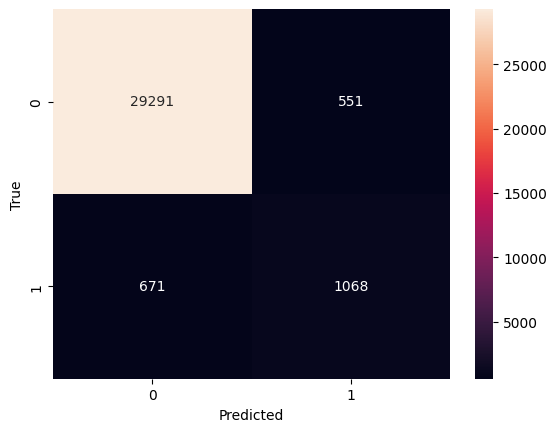

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels.cpu(), pred_labels.cpu())

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [41]:
loss_fn = torch.nn.CrossEntropyLoss()
test_loss = loss_fn(out, data.y)
print(f"Test Loss: {test_loss}")

Test Loss: 0.11893971264362335


#### Save the model

In [43]:
# Save the model's state_dict to a .pth file
torch.save(model.state_dict(), 'model.pth')

In [44]:
# Assume you have the same model architecture
model = GCN(num_node_features=data.num_node_features, num_classes=2)

# Load the model's state_dict
model.load_state_dict(torch.load('/content/model.pth'))

# Put the model into evaluation mode (especially useful if you are doing inference)
model.eval()

# Forward pass (only pass in node features and edges)
out = model(data)

# Get predictions by taking the argmax of the model's output
pred = out.argmax(dim=1)

# Assuming pred and true_labels are the predicted and true labels
true_labels = data.y
pred_labels = pred

precision = precision_score(true_labels.cpu(), pred_labels.cpu(), average='weighted')
recall = recall_score(true_labels.cpu(), pred_labels.cpu(), average='weighted')
f1 = f1_score(true_labels.cpu(), pred_labels.cpu(), average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

<ipython-input-44-6a8ce52a4715>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/model.pth'))


Precision: 0.9600977606579435
Recall: 0.9613058484531839
F1 Score: 0.9606532908931437
